问题：python的class(类)中的object是什么意思

In [3]:
class Person:
    """
    不带object
    """
    name = "zhengtong"
 
 
class Animal(object):
    """
    带有object
    """
    name = "chonghong"
 
if __name__ == "__main__":
    x = Person()
    print("Person", dir(x))
 
    y = Animal()
    print("Animal", dir(x))


Person ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'name']
Animal ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'name']


在python 2中
Person类很明显能够看出区别，不继承object对象，只拥有了__doc__ , __module__ 和 自己定义的name变量, 也就是说这个类的命名空间只有三个对象可以操作.
Animal类继承了object对象，拥有了好多可操作对象，这些都是类中的高级特性。

但是在在python 3中，已经自动帮助我们加上object

# 链表(linked list)

链表(linked list)是由一组被称为结点的数据元素组成的数据结构，每个结点都包含结点本身的信息和指向下一个结点的地址。由于每个结点都包含了可以链接起来的地址信息，所以用一个变量就能够访问整个结点序列。也就是说，结点包含两部分信息：一部分用于存储数据元素的值，称为信息域；另一部分用于存储下一个数据元素地址的指针，称为指针域。  

链表中的第一个结点的地址存储在一个单独的结点中，称为头结点或首结点。

链表中的最后一个结点没有后继元素，其指针域为空。
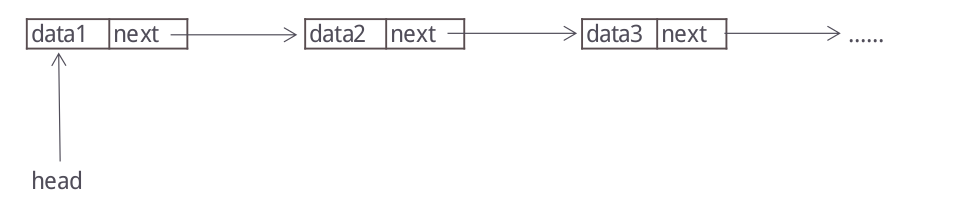


## 用Python实现链表

In [4]:
# define Node
class Node:
    '''
    data: 节点保存的数据
    _next: 保存下一个节点对象
    '''
    def __init__(self, data, pnext=None):
        self.data = data
        self._next = pnext

    def __repr__(self):
        '''
        用来定义Node的字符输出，
        print为输出data
        '''
        return str(self.data)

然后，定义链表类：

链表要包括：

属性：

链表头：head

链表长度：length

In [8]:
class ChainTable(object):
    def __init__(self):
        self.head = None
        self.length = 0

    # 判断链表是否为空
    def isEmpty(self):
        return (self.length == 0)
    
    # 增加节点
    def append(self, dataOrNode):
        item = None
        
        # isinstance() 函数来判断一个对象是否是一个已知的类型，类似 type()。
        # 在这里判断 dataOrNode 是不是 Node 类型
        if isinstance(dataOrNode, Node):
            item = dataOrNode
        else:
            item = Node(dataOrNode)

        if not self.head:
            # If this the first point
            self.head = item
            self.length += 1
        else:
            # 从head节点一只找到 next = null的那个node，也就最后一位
            node = self.head
            while node._next:
                node = node._next
            # 将最后一个node 的 next 指向新的节点
            node._next = item
            self.length += 1
   
    # 删除节点
    def delete(self, index):
        if self.isEmpty():
            print("this chain table is empty.") 
            return

        if index < 0 or index >= self.length:
            print('error: out of index') 
            return

        if index == 0:
            self.head = self.head._next
            self.length -= 1
            return

        j = 0
        node = self.head
        prev = self.head
        while node._next and j < index:
            prev = node
            node = node._next
            j += 1

        if j == index:
            prev._next = node._next
            self.length -= 1

In [10]:
chaiin = ChainTable()
chaiin.append(1)

In [11]:
chaiin

In [22]:
# -*- coding:utf8 -*-
#/usr/bin/env python

class Node(object):
    def __init__(self, data, pnext = None):
        self.data = data
        self._next = pnext

    def __repr__(self):
        return str(self.data)

class ChainTable(object):
    def __init__(self):
        self.head = None
        self.length = 0

    def isEmpty(self):
        return (self.length == 0)

    def append(self, dataOrNode):
        item = None
        if isinstance(dataOrNode, Node):
            item = dataOrNode
        else:
            item = Node(dataOrNode)

        if not self.head:
            self.head = item
            self.length += 1

        else:
            node = self.head
            while node._next:
                node = node._next
            node._next = item
            self.length += 1

    def delete(self, index):
        if self.isEmpty():
            print("this chain table is empty.") 
            return

        if index < 0 or index >= self.length:
            print('error: out of index') 
            return

        if index == 0:
            self.head = self.head._next
            self.length -= 1
            return

        j = 0
        node = self.head
        prev = self.head
        
        # 为什么这里要加 node._next 不等 null
        while node._next and j < index:
            prev = node
            node = node._next
            j += 1

        if j == index:
            prev._next = node._next
            self.length -= 1

    def insert(self, index, dataOrNode):
        if self.isEmpty():
            print("this chain tabale is empty") 
            return

        if index < 0 or index >= self.length:
            print("error: out of index")
            return

        item = None
        if isinstance(dataOrNode, Node):
            item = dataOrNode
        else:
            item = Node(dataOrNode)

        if index == 0:
            item._next = self.head
            self.head = item
            self.length += 1
            return

        j = 0
        node = self.head
        prev = self.head
        while node._next and j < index:
            prev = node
            node = node._next
            j += 1

        if j == index:
            item._next = node
            prev._next = item
            self.length += 1

    def update(self, index, data):
        if self.isEmpty() or index < 0 or index >= self.length:
            print('error: out of index')
            return
        j = 0
        node = self.head
        while node._next and j < index:
            node = node._next
            j += 1

        if j == index:
            node.data = data

    def getItem(self, index):
        if self.isEmpty() or index < 0 or index >= self.length:
            print("error: out of index") 
            return
        j = 0
        node = self.head
        while node._next and j < index:
            node = node._next
            j += 1

        return node.data


    def getIndex(self, data):
        j = 0
        if self.isEmpty():
            print("this chain table is empty") 
            return
        node = self.head
        while node:
            if node.data == data:
                return j
            node = node._next
            j += 1

        if j == self.length:
            print("%s not found" % str(data)) 
            return

    def clear(self):
        self.head = None
        self.length = 0

    def __repr__(self):
        if self.isEmpty():
            return "empty chain table"
        node = self.head
        nlist = ''
        while node:
            nlist += str(node.data) + ' '
            node = node._next
        return nlist

    def __getitem__(self, ind):
        if self.isEmpty() or ind < 0 or ind >= self.length:
            print("error: out of index")
            return
        return self.getItem(ind)

    def __setitem__(self, ind, val):
        if self.isEmpty() or ind < 0 or ind >= self.length:
            print("error: out of index")
            return
        self.update(ind, val)

    def __len__(self):
        return self.length


In [23]:
chaiin = ChainTable()
for i in range(10):
    chaiin.append(i)

In [24]:
chaiin

0 1 2 3 4 5 6 7 8 9 